In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
All_Data = np.load("/content/drive/MyDrive/All_Data.npy")
All_Labels = np.load("/content/drive/MyDrive/All_Labels.npy")

In [3]:
All_Labels = to_categorical(All_Labels, num_classes=5)
In_Train, In_Test, Out_Train, Out_Test =  train_test_split(All_Data, All_Labels, test_size = 0.2, random_state=123)

# CNN accepts 3 dimentional data
In_Train = In_Train.reshape(In_Train.shape[0], 250, 16, 1)
In_Test = In_Test.reshape(In_Test.shape[0], 250, 16, 1)

In [4]:
CNN = Sequential()

CNN.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = In_Train[0].shape))

CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

CNN.add(MaxPool2D(pool_size=(2, 2)))
CNN.add(Flatten())

CNN.add(Dense(units=128, activation='relu'))

CNN.add(Dense(units=5, activation='softmax'))

CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 14, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 7, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 5, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 2, 64)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 7808)              0         
                                                                 
 dense (Dense)               (None, 128)               9

In [5]:
trainingEpochs = CNN.fit(In_Train, Out_Train, batch_size=32, epochs=7, validation_split=0.1)

Epoch 1/7
68/68 [==============================] - 11s 145ms/step - loss: 301090.6875 - accuracy: 0.7837 - val_loss: 4154.0845 - val_accuracy: 0.7992
Epoch 2/7
68/68 [==============================] - 7s 102ms/step - loss: 2048.7800 - accuracy: 0.9254 - val_loss: 479.8541 - val_accuracy: 0.9874
Epoch 3/7
68/68 [==============================] - 5s 72ms/step - loss: 3156.4773 - accuracy: 0.9301 - val_loss: 1049.9689 - val_accuracy: 0.9247
Epoch 4/7
68/68 [==============================] - 5s 73ms/step - loss: 1028.2090 - accuracy: 0.9357 - val_loss: 263.0147 - val_accuracy: 0.9582
Epoch 5/7
68/68 [==============================] - 5s 77ms/step - loss: 516.4886 - accuracy: 0.9427 - val_loss: 212.8764 - val_accuracy: 0.9414
Epoch 6/7
68/68 [==============================] - 5s 71ms/step - loss: 252.7254 - accuracy: 0.9501 - val_loss: 122.5333 - val_accuracy: 0.9582
Epoch 7/7
68/68 [==============================] - 5s 80ms/step - loss: 396.0106 - accuracy: 0.9548 - val_loss: 457.9989 - va

In [6]:
y_pred = np.argmax(CNN.predict(In_Test), axis=1)
Out_Test = np.argmax(Out_Test, axis=1)
cm = confusion_matrix(Out_Test, y_pred)
CNN_Accuracy = np.trace(cm) / np.sum(cm)*100
print("The accuracy of the model is: "+str(np.round(CNN_Accuracy,2))+"%")

19/19 [==============================] - 0s 20ms/step
The accuracy of the model is: 92.45%


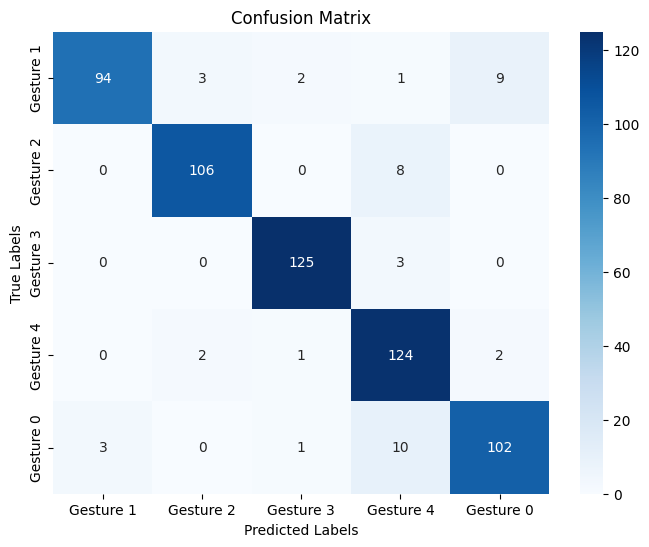

In [7]:
classes = ["Gesture 1", "Gesture 2", "Gesture 3", "Gesture 4", "Gesture 0"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
CNN.save('/content/Robot_Arm_Classification.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
